<a href="https://colab.research.google.com/github/tanriders/Fraud_Detection_AutoEncoder/blob/main/DS_Finance_Fraud_Detection_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fraud detection**

#**1 เตรียม Dataset สำหรับการทำ Fraud detection model**

#Import Library

1.pandas คือ library สำหรับจัดการ dataframe

2.numpy คือ library ที่รวมชุดคำสั่งด้านการคำนวณ​และการทำงานเชิงตัวเลข

3.matplotlib คือ library ที่นิยมใช้มากที่สุดในการ Plot Graph

4.seaborn คือ library ที่มีคำสั่งใช้สร้างกราฟต่างๆ หลายรูปแบบที่สามารถปรับเปลี่ยนการแสดงผล สี เนื้อหา รายละเอียดต่างๆ ได้ครบถ้วน

5.StandardScaler คือ นำเสนอฟังก์ชัน StandardScaler() จากไลบรารี่ scikit-learn เพื่อสร้างมาตรฐานให้กับค่าข้อมูลในรูปแบบมาตรฐาน

6.train_test_split คือ ฟังก์ชั่น train_test_split() จากไลบรารี่ scikit-learn แบบคืนค่า 2 ตัวแปร จะมีหลักการแบ่งข้อมูลจากจำนวนแถวทั้งหมดออกเป็น 2 กลุ่ม

Libraries หลัก ๆ ที่จำเป็นในวันนี้ส่วนมากเป็นพวกที่ใช้กับ DataFrame เป็นส่วนมาก ใครถนัดแบบอื่นก็สามารถใช้ Libraries อื่นได้เช่นกัน เพราะสุดท้ายแล้ว ความต้องการคือ Data ที่สามารถโยนเข้าไป Train กับ Neural network ได้เท่านั้น

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#**Import dataset**

1.   อ่านไฟล์ csv ด้วย pandas
2.   ดู dimension ของ dataframe ว่ามีจำนวน columns, rows เท่าไหร่

In [ ]:
#Import dataset
df = pd.read_csv('/content/drive/MyDrive/DS/DS-Finance/creditcard.csv')
df.shape

(284807, 31)

#**Exploratory Data Analysis**

แสดง DataFrame 10 แถวบนสุด

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


ดู information แบบเต็มๆของ dataframe

list รายชื่อคอลัมน์ทั้งหมดของ dataframe จำนวน complete values (และ missing values) และ Dtype คือประเภทข้อมูล

object คือคอลัมน์ที่เป็น text, string

float64 คือคอลัมน์ที่เป็นตัวเลข numeric แบบมีทศนิยมได้

int64 คือ ตัวเลขจำนวนเต็ม

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Good No Null Values!
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Data visualization

ใช้ seaborn.countplot() และผ่าน Column ที่ต้องการนับจำนวนเข้าไป ในที่นี้ก็คือ Class ที่มีการทำ Normal cases และ Fraud cases ไว้ เห็นได้ว่าจำนวนเคสปกติมีทั้งหมด 284,315 และเคสทุจริตมีเพียง 492 เท่านั้น

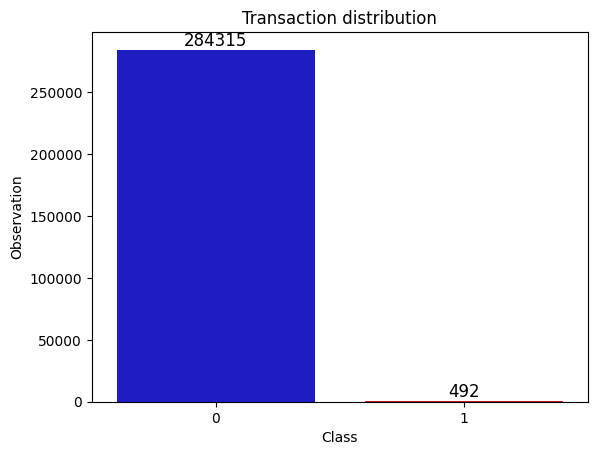

In [ ]:
#Data visualization
colors = ["#0101DF", "#DF0101"]
sns.countplot(x ='Class', palette=colors,  data = df)
for v in [0,1]:
  plt.text(v, (df['Class'] == v).sum(), str((df['Class'] == v).sum()),
           horizontalalignment = 'center',
           verticalalignment = 'bottom',
           fontsize = 12)

# Show the plot
plt.title('Transaction distribution')
plt.xlabel('Class')
plt.ylabel('Observation')
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [ ]:
frauds.shape

(492, 31)

In [ ]:
normal.shape

(284315, 31)

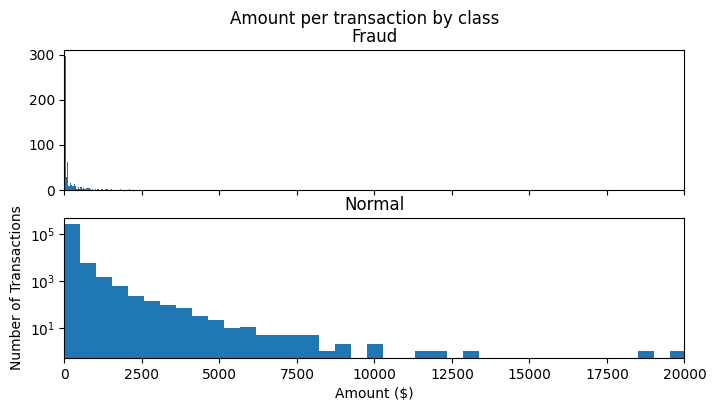

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4),sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim([0, 20000])
plt.yscale('log')
plt.show();

ธุรกรรมฉ้อโกงเกิดขึ้นบ่อยขึ้นในช่วงเวลาใดเวลาหนึ่งหรือไม่?

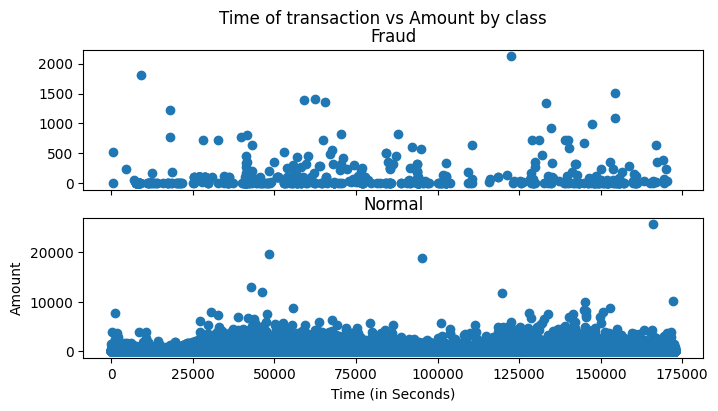

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Time ดูไม่ค่อยมีความสัมพันธ์มากเท่าไหร่

หมายเหตุ: สังเกตว่าชุดข้อมูลดั้งเดิมของเราไม่สมดุลเพียงใด!  imbalanced dataset

ธุรกรรมส่วนใหญ่ไม่มีการฉ้อโกง หากเราใช้ดาต้าเฟรมนี้เป็นฐานสำหรับโมเดลการคาดการณ์และการวิเคราะห์ของเรา เราอาจมีข้อผิดพลาดมากมาย และอัลกอริธึมของเราอาจจะพอดีเกินไป เนื่องจากจะ "assume" ธุรกรรมส่วนใหญ่ไม่มีการฉ้อโกง แต่เราไม่ต้องการให้แบบจำลองของเราสันนิษฐาน แต่เราต้องการให้แบบจำลองของเราตรวจจับรูปแบบที่ทำให้เกิดสัญญาณของการฉ้อโกง!

#**Data preparation**

เตรียม Dataset ให้พร้อมกับการ Training ของ Network

Drop column Time ไม่ขอนำมาเป็น Feature เพราะดูไม่ค่อยมีความสัมพันธ์มากเท่าไหร่

In [ ]:
#Data preparation
df = df.drop(['Time'], axis = 1) #Don't need to use 'Time' feature

ทำการ Scale column 'Amount' ด้วย StandardScaler() เพื่อทำการกำจัด Mean ออกไปก่อน (ทำให้ Basis มันใกล้เคียง PCA)

In [ ]:
#Scale 'Amount' to remove the mean
scale = StandardScaler()
df['Amount'] = scale.fit_transform(df['Amount'].values.reshape(-1, 1))

ทำการแบ่ง Dataset ด้วย train_test_split

โดยแบ่งเป็น 80/20 (สุ่มทีละ 7 ตัว โดยสามารถเปลี่ยนแปลงค่า random_state ตามต้องการ)

โดย 20% เอาไว้ทดสอบโมเดลด้วยการทำ Reconstruction error

(สิ่งหนึ่งที่ต่างออกไปจากการโมเดลปกติคือ Training dataset มีแค่ Features ของ Class ปกติเท่านั้น ไม่มี Dependence หรือตัวแปร Y เข้ามาเกี่ยวข้อง)

In [ ]:
#Split data for training and testing
train, test = train_test_split(df, test_size = 0.2, random_state = 7)
x_train = train[train['Class'] == 0]
x_train = x_train.drop(['Class'], axis = 1)
x_test = test.iloc[:,:-1] #Don't need 'Class'

y_test = test['Class'] #Need only 'Class' for validation

#Covert to values
x_train = x_train.values
x_test = x_test.values
y_test = y_test.values
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)


(227453, 29)
(56962, 29)
(56962,)


#**2 Develop neural network เพื่อสร้าง Model**

#Import Library

keras คือ Deep Learning Library ที่ใช้งานง่าย แต่มีประสิทธิภาพสูงในการรัน Model

In [ ]:
#Import libraries
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import regularizers

#Autoencoder model



กำหนด input_layer ก่อน โดยให้ข้อมูลที่ต้องการ Encode คือ Features ทั้งหมด ซึ่งมีขนาดเท่ากับ Columns shape[1] ที่ DataFrame ที่ทำเอาไว้ตั้งแต่ตอนก่อนหน้า

**Encoder**

Encoder แรกทำการลดมิติของข้อมูลลงไปครึ่งนึง (อันนี้ตามที่ธรรมเนียมปฏิบัติกันมา)

ส่วนของ Activation function ขอใช้เป็น ‘tanh’

เพราะเนื่องจากข้อมูลเข้ามีค่าน้อยกว่า 0 แล้วใช้ regularizers.l1(learning_rate) เพื่อสกัดเอาเฉพาะ Features ที่มีผลกับข้อมูลออกมา

จากนั้นทำ Encoding อีก 1 Layer ลดมิติลงไปอีกครึ่งนึงด้วยการหาร 4 จากข้อมูลทั้งหมด

**Decoder**

ต่อมาเราทำการขยายมิติข้อมูลกลับให้มีขนาดเท่าเดิมตาม Concept ของ Autoencoder ตามธรรมเนียมนิยมอีกเช่นกัน เรานิยมสร้าง Decode layer ให้เท่ากับขาที่เรา Encode เข้ามา ซึ่งให้เข้าใจง่ายที่สุดคือ เขียนตรงข้ามกับที่เขียนมานั่นเอง

**output_layer**

output_layer ให้ Activation function เป็น ‘linear’

Model() ใส่เป็น input_layer และ output_layer ที่เพิ่งสร้างขึ้นมา เท่านี้เป็นอันเสร็จสำหรับ Neural network ของเราสำหรับ Fraud detection model




*   lr_rate การกำหนด learning rate เพื่อให้ค่า weight เปลี่ยนแปลงไปในแต่ละรอบของการเทรน (Epoch)

*  **epoch** จำนวนรอบของการเทรน โดยแต่ละ Epoch จะทำให้ Loss ลดลง ในขณะที่ Accuracy เพิ่ม  epoch มีความหมายว่า เมื่อเรานำข้อมูลทั้งหมดมาใช้สอนโมเดลครบหนึ่งรอบ เราเรียกว่า 1 epoch ดังนั้น ถ้าบอกว่ารัน 50 epochs ก็คือเราจะสอนโมเดลด้วยข้อมูลทั้งหมดจนครบ 50 รอบ
*   **batch_size** ขนาดของ Batch ซึ่งก็คือจำนวนรายการข้อมูลที่จะให้ Optimiser คำนวนในหนึ่งครั้ง เช่น ข้อมูลมี 2,000 รายการ ถ้ากำหนด Batch size เป็น 32 แปลว่า Optimiser จะต้องทำงาน 62.5 ครั้ง จึงจะครบทั้ง 2,000 รายการ ถ้ากำหนด Epoch เป็น 20 ก็หมายถึงการทำงาน 62.5 ครั้ง 20 รอบ




In [ ]:
#Autoencoder model
lr_rate = 1e-3
epoch = 200
batch_size = 128

def autoencoder_model(x):
  input_layer = Input(shape = (x.shape[1], ))
  encoder = Dense(x.shape[1] // 2, activation = 'tanh', activity_regularizer = regularizers.l1(lr_rate))(input_layer)
  encoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
  decoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
  decoder = Dense(x.shape[1] // 2, activation = 'tanh')(decoder)
  output_layer = Dense(x.shape[1], activation = 'linear')(decoder)
  model = Model(inputs = input_layer, outputs = output_layer)
  return model

**Model compile**

การ compile() ครั้งนี้ใช้ mean_squared_error วัดค่า Loss function ที่เกิดขึ้นระหว่างการ Training และใช้ optimizer = ‘adam’ สั่ง model.summary() หน้าตา Network ทั้งหมดได้ออกมาแบบนี้

Adam: Adaptive Moment Estimation เป็น optimizer ที่สามารถปรับ learning rates สำหรับพารามิเตอร์ในแต่ละครั้ง

Adam เป็น optimizer ที่เป็นที่นิยมมากที่สุดเพราะรวมจุดเด่นของแต่ละ Optimizer แล้วลบจุดด้อยต่างๆออกไปทั้งการ decaying learning rate ของ adagrad ช่วยให้โมเดลไม่หยุดเรียนได้ อีกทั้งยังไวกว่า Gradient Descent และลดปัญหาการแกว่งของพารามิเตอร์ได้อีกด้วย

In [ ]:
#Model compile
model = autoencoder_model(x_train)
model.compile(metrics = ['accuracy'], loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 14)                420       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 14)                112       
                                                                 
 dense_4 (Dense)             (None, 29)                435       
                                                                 
Total params: 1128 (4.41 KB)
Trainable params: 1128 (4.41 KB)

#Training model

Train model ตาม epoch ที่เรากำหนดไว้ตั้งแต่ต้น ซึ่งเท่ากับ 200 Epochs สิ่งที่ต่างออกไปจากการ Train model ปกติก็คือเราใช้ x_train ทั้งคู่ (ซึ่งปกติต้องเป็นตัวแปร Y) เช่นเดียวกันกับ validation_data ก็ใช้ x_test ทั้งคู่เช่นกัน

In [ ]:
#Training model
history = model.fit(x_train, x_train, epochs = epoch,
                    batch_size = batch_size, shuffle = True,
                    validation_data = (x_test, x_test), verbose = 0).history

#Save model

เมื่อ Train ได้ Loss ตามที่เราต้องการแล้ว ก็ Save เก็บไว้เพื่อเรียกใช้งานในครั้งต่อ ๆ ไป

In [ ]:
#Save model
model.save('fraud_detection.model')

In [ ]:
autoencoder = load_model('fraud_detection.model')

#**3 Evaluation Model**

In [ ]:
predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 [==============================] - 2s 1ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.371825,0.001756
std,5.172151,0.041863
min,0.020065,0.000000
25%,0.111829,0.000000
50%,0.178315,0.000000
75%,0.338672,0.000000
max,1102.416423,1.000000


Plot loss function ออกมาเพื่อดูว่า Model training ออกมาว่าเป็นอย่างไร

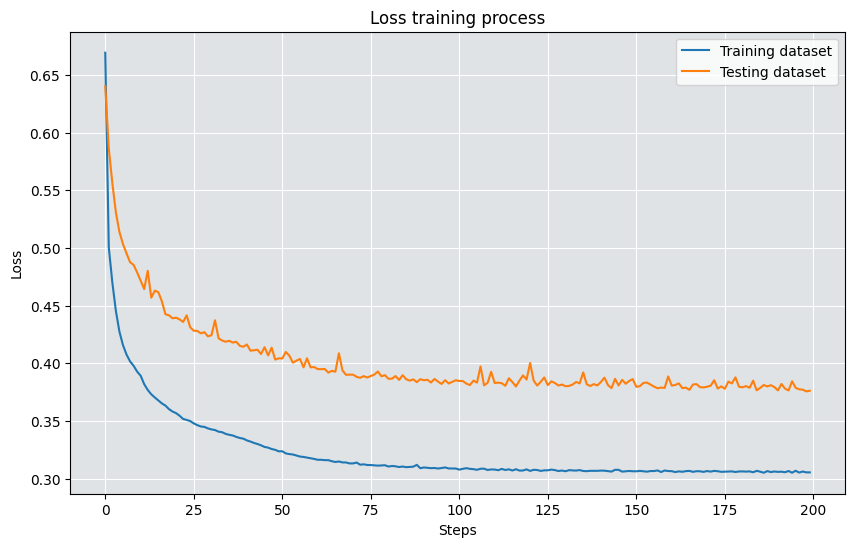

In [ ]:
#Model Evaluate
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss training process')
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.legend(['Training dataset', 'Testing dataset'], loc = 'upper right')

ค่า MSE ที่ออกมาอยู่ราว ๆ 30% สำหรับ Training set และประมาณ 36% ของ Testing set อาจยังดูเหมือนเยอะ สามารถลองปรับ Network เพิ่มเติมได้

#**Reconstruction error**

ส่วนสุดท้ายสำหรับโมเดลครั้งนี้คือ Reconstruction error ซึ่งค่า Error ที่ใช้ก็คือ MSE โดยใช้ Model ที่สร้างขึ้นมาไปทำการ Predict ข้อมูลที่ Model ไม่เคยเห็น (Testing data) ซึ่งเป็นข้อมูลจริง แล้วเราหา Error ที่เกิดขึ้นด้วย MSE เมื่อได้ค่าออกมาแล้ว เราก็สร้างเป็น Array เก็บค่าจริงและค่า Error เอาไว้

In [ ]:
#Reconstruction error
predicts = model.predict(x_test)
re_error = ((x_test - predicts) ** 2).mean(axis = 1)
re_error = np.stack((y_test, re_error), axis = -1)
print(re_error)

1781/1781 [==============================] - 2s 1ms/step
[[0.         0.12169779]
 [0.         0.26948903]
 [0.         0.67661741]
 ...
 [0.         0.13665238]
 [0.         0.11006538]
 [0.         0.22428201]]


การหาค่า MSE เราไม่ได้หาค่าจากข้อมูลทั้งหมด (ถ้าดูจากโค้ดด้านบน) เราทำการหาผลต่างระหว่างค่า 2 ค่า ยกกำลัง 2 เพื่อให้ได้เลขที่เป็นบวก แล้วหารด้วย n ซึ่งเท่ากับ 2 แทนด้วยค่าจริงและค่า Predicted จากโมเดล ดังนั้นเราจึงไม่ได้สามารถใช้ Library สำเร็จรูปจาก scikit-learn ได้

Text(0.5, 1.0, 'normal_error_df')

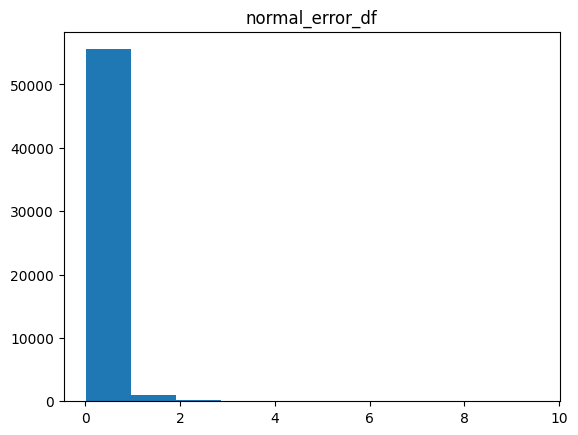

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)
plt.title('normal_error_df')

Text(0.5, 1.0, 'fraud_error_df')

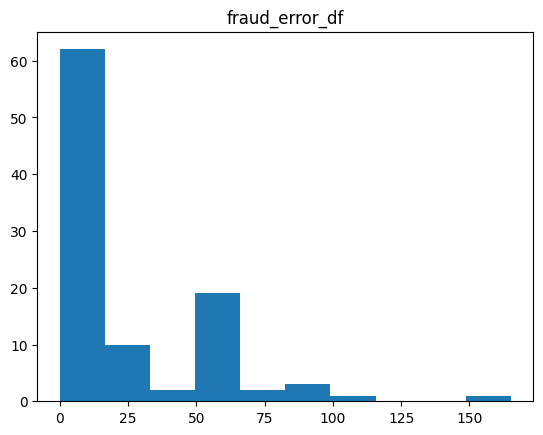

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)
plt.title('fraud_error_df')

#**Model performance**

**ROC Curve**

ROC เป็นค่าทางสถิติค่าหนึ่ง ที่สามารถบอกความแม่นยำของในการแบ่งแยกประเภทใด ๆ ตามแต่ที่สร้างโมเดลขึ้นมา ดังนั้งจึงขอ Plot ROC Curve เพื่อเป็น Reference ซึ่งกราฟที่ออกมาถือเป็นไปในทางที่ดี เพราะเส้นที่เกิดจากโมเดลเกือบเข้าไปใกล้ Perfect curve (100%)

AUC ย่อมาจาก “Area Under <ROC> Curve” เป็นอีกหนึ่ง metric ยอดนิยมที่ใช้กันแทบทุกงานเลย AUC มีค่าอยู่ระหว่าง 0-1 ยิ่งเข้าใกล้ 1 แปลว่าโมเดลในภาพรวมสามารถทำนาย y ได้ดีมาก

AUC = 0.50 ไม่ต่างอะไรกับการเดาสุ่มเลย

AUC > 0.70 คือเกณฑ์มาตรฐานสำหรับโมเดลส่วนใหญ่

AUC > 0.80 โมเดลทำงานได้ดี

AUC > 0.90 โมเดลทำงานได้ดีมาก

Text(0.5, 0, 'False positive')

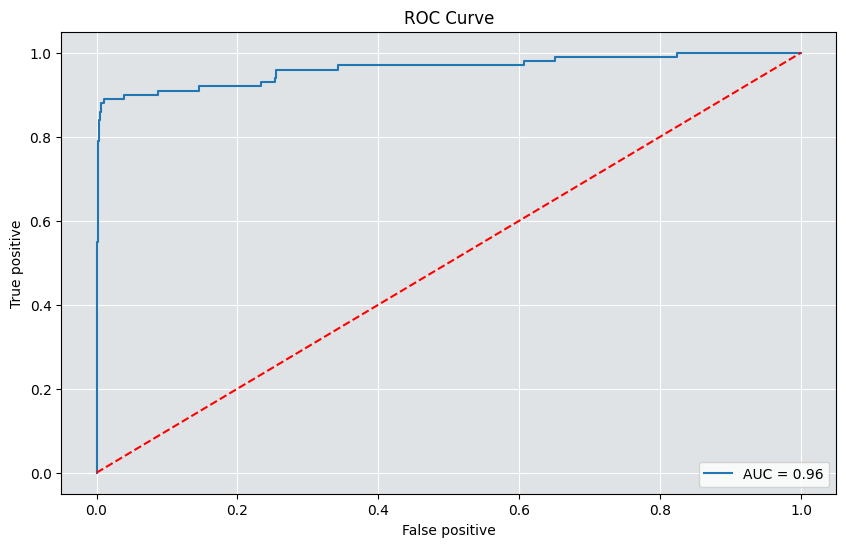

In [ ]:
#ROC Curve
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

#Plotting ROC Curve
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.ylabel('True positive')
plt.xlabel('False positive')

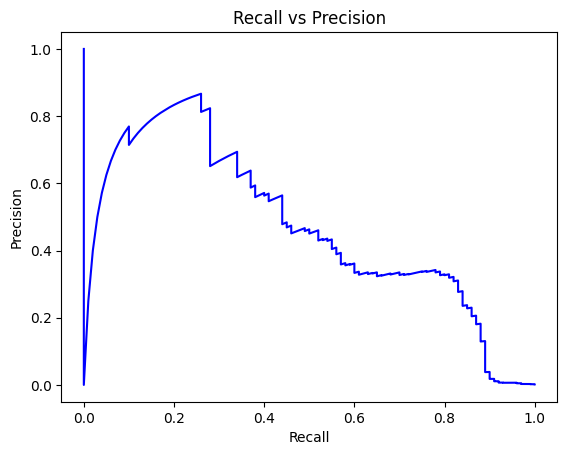

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**Confusion matrix**

การใช้งานโมเดลเพื่อแบ่งแยกเคสที่เป็นทุจริตออกจากเคสปกติ วิธีการคือ ต้องกำหนดค่าความเชื่อมั่นของขึ้นมาก่อน ซึ่งจริง ๆ เป็นตัวเลขอะไรก็ได้ ที่กำลังบอกโมเดลว่าถ้ามีค่า Error ที่มากกว่าค่าที่กำหนด จะถูกมองว่าเป็น Fraud ซึ่งก็ตรงตามหลักการที่โมเดลถูกสร้างขึ้นมา ที่บอกว่าอะไรก็ตามที่ Error สูง แสดงว่า Model ไม่ได้สามารถ Encode และ Decode กลับเป็นเหมือนเดิมได้ ดังนั้นจึงถือว่าเป็น Fraud



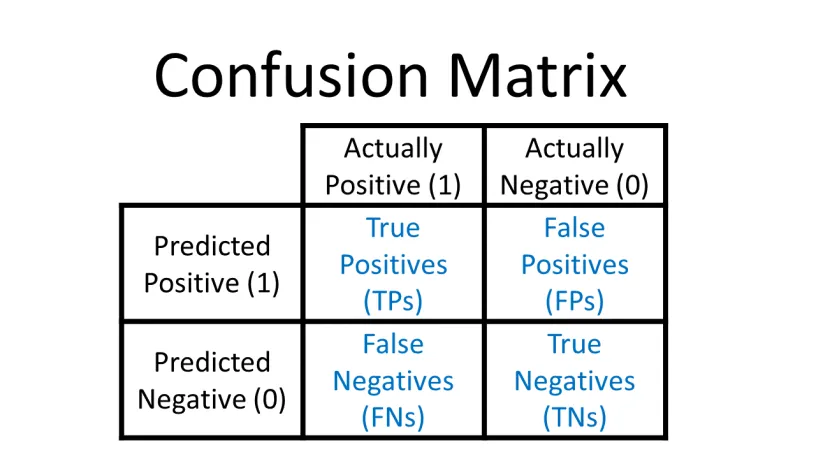

Fraud = จริง , Norml = ไม่จริง

True Positive (TP)= สิ่งที่ทำนาย ตรงกับสิ่งที่เกิดขึ้นจริง ในกรณี ทำนายว่าจริง และสิ่งที่เกิดขึ้น ก็คือ จริง

True Negative (TN)= สิ่งที่ทำนายตรงกับสิ่งที่เกิดขึ้น ในกรณี ทำนายว่า ไม่จริง และสิ่งที่เกิดขึ้น ก็คือ ไม่จริง

False Positive (FP)= สิ่งที่ทำนายไม่ตรงกับสิ่งที่เกิดขึ้น คือทำนายว่า จริง แต่สิ่งที่เกิดขึ้น คือ ไม่จริง

False Negative (FN)= สิ่งที่ทำนายไม่ตรงกับที่เกิดขึ้นจริง คือทำนายว่าไม่จริง แต่สิ่งที่เกิดขึ้น คือ จริง

Text(0.5, 14.722222222222216, 'Predicted class')

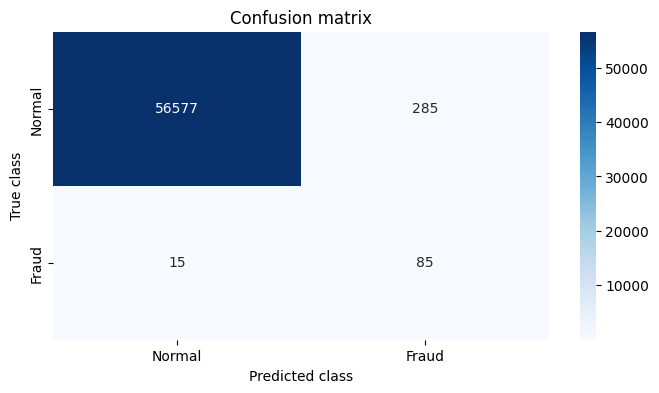

In [ ]:
#Confusion matrix
thres = 2.5
y_predict = [1 if e > thres else 0 for e in re_error[:,1]]
matrix = confusion_matrix(error_df.true_class, y_predict)
LABELS = ["Normal", "Fraud"]
#Plotting confusion matrix
plt.figure(figsize = (8, 4))
sns.heatmap(matrix, xticklabels=LABELS, yticklabels=LABELS, annot = True, fmt = 'd', cmap = 'Blues');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

จาก Confusion matrix เห็นได้ว่าที่ thres= 2.5 Model บอกว่าเคสปกติถูกมองว่าเป็น Fraud ทั้งหมด 281 รายการ  (FP) และเคสที่เป็น Fraud อยู่แล้ว กลับถูกมองว่าเป็นเคสปกติทั้งหมด 14 รายการ  (FN) สิ่งที่พูดมาทั้งหมดนี้คือ Error ที่เกิดขึ้นจากโมเดล ดังนั้นเมื่อเราขยับ Threshold ให้เพิ่มสูงขึ้น (Relax assumption) เคสปกติที่ถูกมองว่าเป็น Fraud ก็จะมีจำนวนที่ลดลง เป็นต้น

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(error_df.true_class, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56862
           1       0.23      0.85      0.36       100

    accuracy                           0.99     56962
   macro avg       0.61      0.92      0.68     56962
weighted avg       1.00      0.99      1.00     56962



**Prediction**

ลอง Plot scatter ออกมาเพื่อให้เห็นภาพง่ายกว่าเดิม สามารถดูได้ว่า Observation ใด ๆ ที่อยู่เกินเส้นสีแดงที่ thres = 2.5 จะถูกนับว่าเป็น Fraud ทั้งหมด

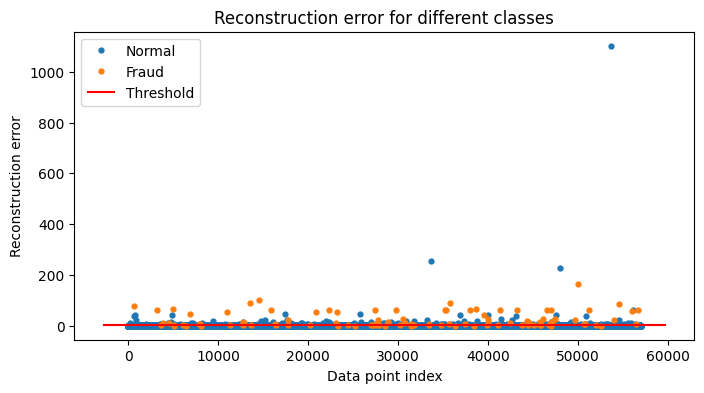

In [ ]:
#Prediction
groups = error_df.groupby('true_class')

fig, ax = plt.subplots(figsize=(8, 4))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(thres, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


In [ ]:
predictions = np.array(y_predict)
compare = pd.DataFrame(predictions, columns=['Prediction'])
y_compare = pd.concat([error_df, compare], axis =1)
y_compare.head()

,reconstruction_error,true_class,Prediction
0,0.121698,0,0
1,0.269489,0,0
2,0.676617,0,0
3,0.072916,0,0
4,0.371355,0,0


In [ ]:

def checking(y_compare):
    if y_compare['true_class'] == 1 and  y_compare['Prediction'] == 1 :
        conf = "TP"
    elif y_compare['true_class'] == 0 and  y_compare['Prediction'] == 0 :
        conf = "TN"
    elif y_compare['true_class'] == 1 and  y_compare['Prediction'] == 0 :
        conf = "FP"
    else:
        conf = "FN"
    return conf

y_compare['conf'] = y_compare.apply(checking, axis = 1)
y_compare.head()

,reconstruction_error,true_class,Prediction,conf
0,0.121698,0,0,TN
1,0.269489,0,0,TN
2,0.676617,0,0,TN
3,0.072916,0,0,TN
4,0.371355,0,0,TN


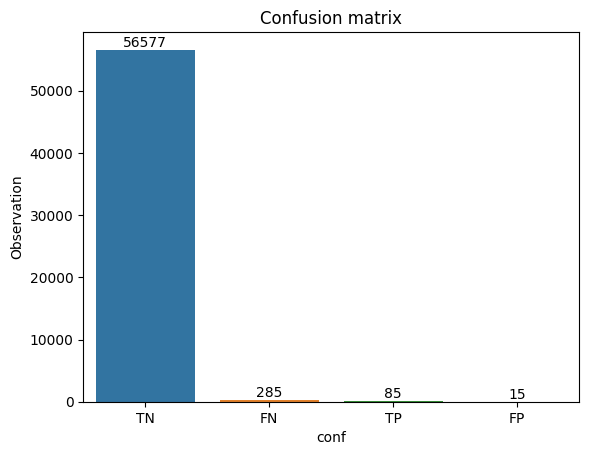

In [ ]:
ax =sns.countplot(x ='conf',  data = y_compare)

for label in ax.containers:
    ax.bar_label(label)
# Show the plot
plt.title('Confusion matrix')
plt.xlabel('conf')
plt.ylabel('Observation')
plt.show()

In [ ]:
list1 = ['FN', 'FP']

# check the pandas name column
# contain the given list of strings
conf_comp = y_compare[y_compare['conf'].isin(list1)]
conf_comp.shape
conf_comp.head(300)

,reconstruction_error,true_class,Prediction,conf
237,12.629427,0,1,FN
605,37.608275,0,1,FN
752,42.731047,0,1,FN
813,4.530658,0,1,FN
859,22.952903,0,1,FN
...,...,...,...,...
55860,9.213434,0,1,FN
56162,63.447055,0,1,FN
56305,4.931662,0,1,FN
56886,2.738964,0,1,FN


#Conclusion

อันนี้ถือเป็นการทำโมเดล Fraud แบบง่ายและพื้นฐานมาก ๆ เพราะวิธีการทำโมเดลประเภทนี้มีเยอะมาก รวมไปถึงเทคนิคต่าง ๆ ที่เอาไว้จัดการกับ Imbalance dataset หรือจะเป็นการออกแบบ Network โดยใช้ LSTM เข้ามาช่วยในการ Training model